In [306]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from fooof.utils.params import compute_knee_frequency
from pathlib import Path
import glob
from math import floor
from scipy import stats
import math
import sys
from scipy import stats

#sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers/")
#from utils import resample_stages

In [50]:
cd 'Columbia/Results/Time-resolved/E257'

[Errno 2] No such file or directory: 'Columbia/Results/Time-resolved/E257'
/home/b1044271/Columbia/Results/Time-resolved/E257


In [51]:
ls

Knee_k.npy
Knee_k_20_2.npy
Offset_k_20_2.npy
Offset_nk_20_2.npy
Slope_k.npy
Slope_k_20_2.npy
Slope_nk.npy
Slope_nk_20_2.npy
Transitions/
VP01_notch2_ica_done.set_AllNight_Knee
VP01_notch2_ica_done.set_AllNight_NoKnee
VP03_notch2_ica_done.set_AllNight_Knee
VP03_notch2_ica_done.set_AllNight_NoKnee
VP04_notch2_ica_done.set_AllNight_Knee
VP04_notch2_ica_done.set_AllNight_NoKnee
VP05_notch2_ica_done.set_AllNight_Knee
VP05_notch2_ica_done.set_AllNight_NoKnee
VP06_notch2_ica_done.set_AllNight_Knee
VP06_notch2_ica_done.set_AllNight_NoKnee
VP07_notch2_ica_done.set_AllNight_Knee
VP07_notch2_ica_done.set_AllNight_NoKnee
VP08_notch2_ica_done.set_AllNight_Knee
VP08_notch2_ica_done.set_AllNight_NoKnee
VP10_notch2_ica_done.set_AllNight_Knee
VP10_notch2_ica_done.set_AllNight_NoKnee
VP11_notch2_ica_done.set_AllNight_Knee
VP11_notch2_ica_done.set_AllNight_NoKnee
VP12_notch2_ica_done.set_AllNight_Knee
VP12_notch2_ica_done.set_AllNight_NoKnee
VP13_notch2_ica_done.set_AllNight_Knee
VP13_notch2_ica_done.set

In [52]:
# get all FOOOF files
path_files = '/home/b1044271/Columbia/Results/Time-resolved/E257/*.npy'
aperiodic_files = glob.glob(path_files)

In [53]:
# get all FOOOF files
staging_files = '/home/b1044271/EEGsleep/SleepStaging/*.txt'
stage_files = glob.glob(staging_files)

In [124]:
sfiles = np.zeros([17,50000])*np.nan
i=0
for X in stage_files:
    x  = resample_stages(X, 2)
    sfiles[i,0:len(x)] = x
    i=i+1

In [156]:
aperiodic_files

['/home/b1044271/Columbia/Results/Time-resolved/E257/Slope_k.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Slope_nk.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/r2_k.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/r2_nk.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Knee_k.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Slope_nk_20_2.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Slope_k_20_2.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/r2_k_20_2.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/r2_nk_20_2.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Knee_k_20_2.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Offset_nk_20_2.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Offset_k_20_2.npy']

In [349]:
t = 2 #time window we use for FOOOF
intrvl = 60 #length of the intercal we want to look at before and after transition point (in sec)
i = 0
b=[2,3] #NREM stages

N21m_a = np.zeros([17, 60])*np.nan
N23m_a = np.zeros([17, 60])*np.nan
R2Nm_a = np.zeros([17, 60])*np.nan
N2Rm_a = np.zeros([17, 60])*np.nan

f = aperiodic_files[9]    
A = np.load(f)
for x in np.arange(17):
    Stage = sfiles[x][~np.isnan(sfiles[x])] # load sleep stages
    param = A[x] # load parameter array
        
    # This section deals with the different stages and the transitions between them
    # First we wanted to see the transitions from N2
    N2_o = [ii for ii in range(len(Stage)) if Stage.astype(int)[ii] == 2] # get N2 epochs 
    N2_l = np.array(Stage)[np.array([iii + 1 for iii in N2_o[0:-2]])]
    N2_n1 = [iv for iv in range(len(N2_l)) if N2_l[iv] == 1]
    N2_n3 = [iv for iv in range(len(N2_l)) if N2_l[iv] == 3]
        
    N1t = [N2_o[idx] for idx in N2_n1]
    N3t = [N2_o[idx] for idx in N2_n3]
        
    N21 = np.zeros([len(N1t),60])*np.nan
    ii = 0
    for l in N1t:   
        N21[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
        ii = ii+1
    
    ii = 0
    N23 = np.zeros([len(N3t),60])*np.nan
    for l in N3t:
        N23[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
        ii = ii+1
        
    N21m_a[i,0:60] = np.nanmean(N21,axis=0)
    N23m_a[i,0:60] = np.nanmean(N23,axis=0)

        
        # Second REM _ NREM Transitions
    R_o = [ii for ii in range(len(Stage)) if Stage.astype(int)[ii] == 5] # get N2 epochs 
    R_after  = np.array(Stage)[np.array([iii + 1 for iii in R_o[0:-2]])]
    R_before = np.array(Stage)[np.array([iii - 1 for iii in R_o[0:-2]])]
     
    R_N = [iv for iv, e in enumerate(R_after) if e in b]
    N_R = [iv for iv, e in enumerate(R_before) if e in b]
        
    After_t = [R_o[idx] for idx in R_N]
    Before_t = [R_o[idx] for idx in N_R]
        
    R_to_N = np.zeros([len(After_t),60])*np.nan
    ii = 0
    for l in After_t:   
        R_to_N[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
        ii = ii+1
        
    ii = 0
    N_to_R = np.zeros([len(Before_t),60])*np.nan
    for l in Before_t:
        N_to_R[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
        ii = ii+1
            
    R2Nm_a[i,0:60] = np.nanmean(R_to_N,axis=0)
    N2Rm_a[i,0:60] = np.nanmean(N_to_R,axis=0)

    i = i+1

    

/tmp/ipykernel_665634/3869868000.py:66: RuntimeWarning: Mean of empty slice
  R2Nm_a[i,0:60] = np.nanmean(R_to_N,axis=0)


In [371]:
R2Nm_a[1]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

In [357]:
plot_event_related_lines(R2Nm_a, N2Rm_a, np.arange(-60,60,2),'REM --> NREM','NREM --> REM', 'Knee')
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)
plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)


(17, 60)

In [348]:
f = aperiodic_files[9]    
f

'/home/b1044271/Columbia/Results/Time-resolved/E257/Knee_k_20_2.npy'

In [ ]:
17*

In [ ]:
t = 2 #time window we use for FOOOF
intrvl = 60 #length of the intercal we want to look at before and after transition point (in sec)
i = 0
b=[2,3] #NREM stages

N21m = np.zeros([17*len(aperiodic_files), 60])*np.nan
N23m = np.zeros([17*len(aperiodic_files), 60])*np.nan
R2Nm = np.zeros([17*len(aperiodic_files), 60])*np.nan
N2Rm = np.zeros([17*len(aperiodic_files), 60])*np.nan

for f in aperiodic_files:
    
    A = np.load(f)
    for x in np.arange(17):
        Stage = sfiles[x][~np.isnan(sfiles[x])] # load sleep stages
        param = A[x] # load parameter array
        
        # This section deals with the different stages and the transitions between them
        
        # First we wanted to see the transitions from N2
        N2_o = [ii for ii in range(len(Stage)) if Stage.astype(int)[ii] == 2] # get N2 epochs 
        N2_l = np.array(Stage)[np.array([iii + 1 for iii in N2_o[0:-2]])]
        N2_n1 = [iv for iv in range(len(N2_l)) if N2_l[iv] == 1]
        N2_n3 = [iv for iv in range(len(N2_l)) if N2_l[iv] == 3]
        
        N1t = [N2_o[idx] for idx in N2_n1]
        N3t = [N2_o[idx] for idx in N2_n3]
        
        N21 = np.zeros([len(N1t),60])*np.nan
        ii = 0
        for l in N1t:   
            N21[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
            ii = ii+1
        N23 = np.zeros([len(N3t),60])*np.nan
        for l in N3t:
            N23[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
        
        ii = ii+1
        N21m[i,0:60] = np.nanmean(N21,axis=0)
        N23m[i,0:60] = np.nanmean(N23,axis=0)

        
        # Second REM _ NREM Transitions
        R_o = [ii for ii in range(len(Stage)) if Stage.astype(int)[ii] == 5] # get N2 epochs 
        R_after  = np.array(Stage)[np.array([iii + 1 for iii in R_o[0:-2]])]
        R_before = np.array(Stage)[np.array([iii - 1 for iii in R_o[0:-2]])]
     
        R_N = [iv for iv, e in enumerate(R_after) if e in b]
        N_R = [iv for iv, e in enumerate(R_before) if e in b]
        
        After_t = [R_o[idx] for idx in R_N]
        Before_t = [R_o[idx] for idx in N_R]
        
        R_to_N = np.zeros([len(After_t),60])*np.nan
        ii = 0
        for l in After_t:   
            R_to_N[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
            ii = ii+1
        
        ii = 0
        N_to_R = np.zeros([len(Before_t),60])*np.nan
        for l in Before_t:
            N_to_R[ii,0:60] = param[int(l-(intrvl/t)): int(l+(intrvl/t))]
            ii = ii+1
            
        R2Nm[i,0:60] = np.nanmean(R_to_N,axis=0)
        N2Rm[i,0:60] = np.nanmean(N_to_R,axis=0)

        i = i+1

    
    
    
    
    
    

In [274]:
len(np.nanmean(R_to_N,axis=0))

60

In [340]:
#SLOPE No Knee
S1_2_20 = N21m[86:103,:]
S3_2_20 = N23m[86:103,:]

S_RN_2_20 = R2Nm[86:103,:]
S_NR_2_20 = N2Rm[86:103,:]


In [278]:
def resample_stages(path_file, new_samp_rate):
    stage_file = pd.read_csv(path_file)
    #set required time resolution - stages are in 30 seconds so the conversion depends on the time resolution specified
    cov_eq = 30/new_samp_rate
    stages = list(stage_file.iloc[:,0])
    stages_n = [val for val in stages for _ in range(0, floor(cov_eq))]
    return(stages_n)

In [319]:
def plot_event_related_lines(data1, data2, xaxis, label1 , label2, Title):
    
    data1m = np.nanmean(data1,axis=0)
    data1s = stats.sem(data1,0, nan_policy = 'omit')
    
    data2m = np.mean(data2,axis=0)
    data2s = stats.sem(data2,0, nan_policy = 'omit')

    
    
    plt.plot(xaxis, data1m,color='b',linestyle='-',linewidth=3, label = label1)
    plt.fill_between(xaxis, data1m-data1s, data1m+data1s,facecolor='b', alpha=0.25)

    plt.plot(xaxis, data2m,color='r',linestyle='-',linewidth=3, label = label2)
    plt.fill_between(xaxis, data2m-data2s, data2m+data2s,facecolor='r', alpha=0.25)

    plt.legend(prop={'size': 16}, frameon=False)
    plt.title(Title, fontsize = 24)

    #plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    #plt.ylabel('exponent', fontsize=28)
    #plt.xlabel('time relative to transition (s)', fontsize=20)
    
    


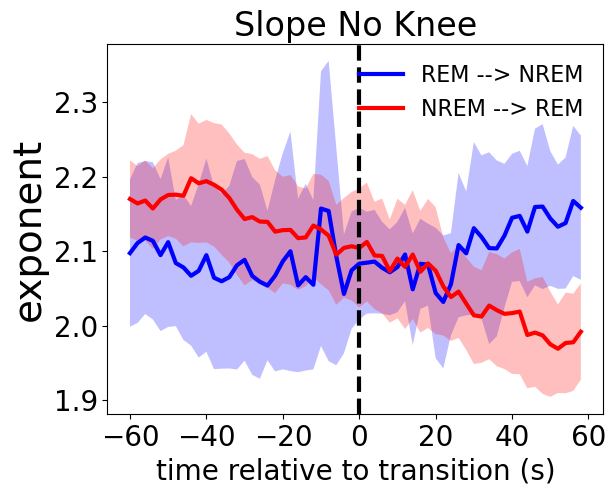

In [341]:
plot_event_related_lines(S_RN_2_20, S_NR_2_20, np.arange(-60,60,2),'REM --> NREM','NREM --> REM', 'Slope No Knee')
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)
plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)


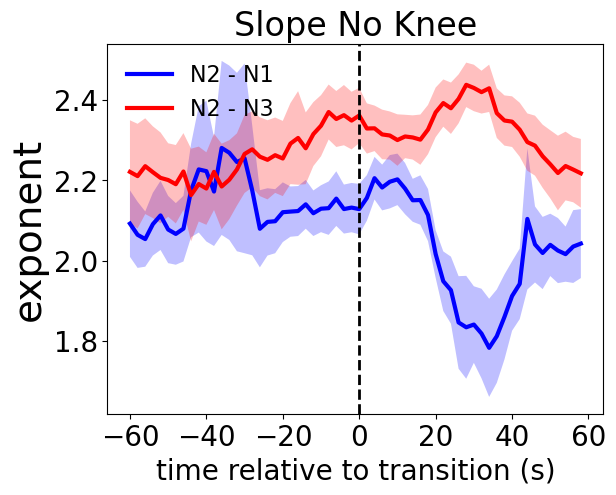

In [342]:
plot_event_related_lines(S1_2_20, S3_2_20, np.arange(-60,60,2),'N2 - N1','N2 - N3', 'Slope No Knee')
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)
plt.axvline(x= 0, color='k',linestyle='--',linewidth=2)


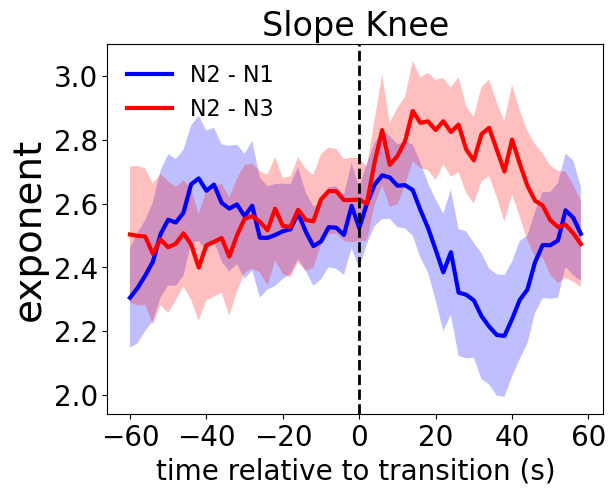

In [343]:
#SLOPE No Knee
S1_2_20 = N21m[103:120,:]
S3_2_20 = N23m[103:120,:]

S_RN_2_20 = R2Nm[103:120,:]
S_NR_2_20 = N2Rm[103:120,:]

plot_event_related_lines(S1_2_20, S3_2_20, np.arange(-60,60,2),'N2 - N1','N2 - N3', 'Slope Knee')
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=2)


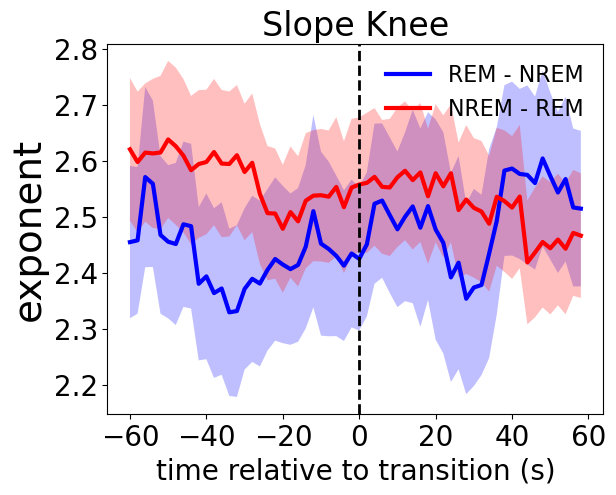

In [363]:
plot_event_related_lines(S_RN_2_20, S_NR_2_20, np.arange(-60,60,2),'REM - NREM','NREM - REM', 'Slope Knee')
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=2)